<a href="https://colab.research.google.com/github/Vedant2005goyal/Stock-price-prediction-/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2369 non-null   int64  
 1   date        2369 non-null   object 
 2   open        2369 non-null   float64
 3   high        2369 non-null   float64
 4   low         2369 non-null   float64
 5   close       2369 non-null   float64
 6   adjclose    2369 non-null   float64
 7   volume      2369 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 148.2+ KB
Duplicated value in data set is :- 0


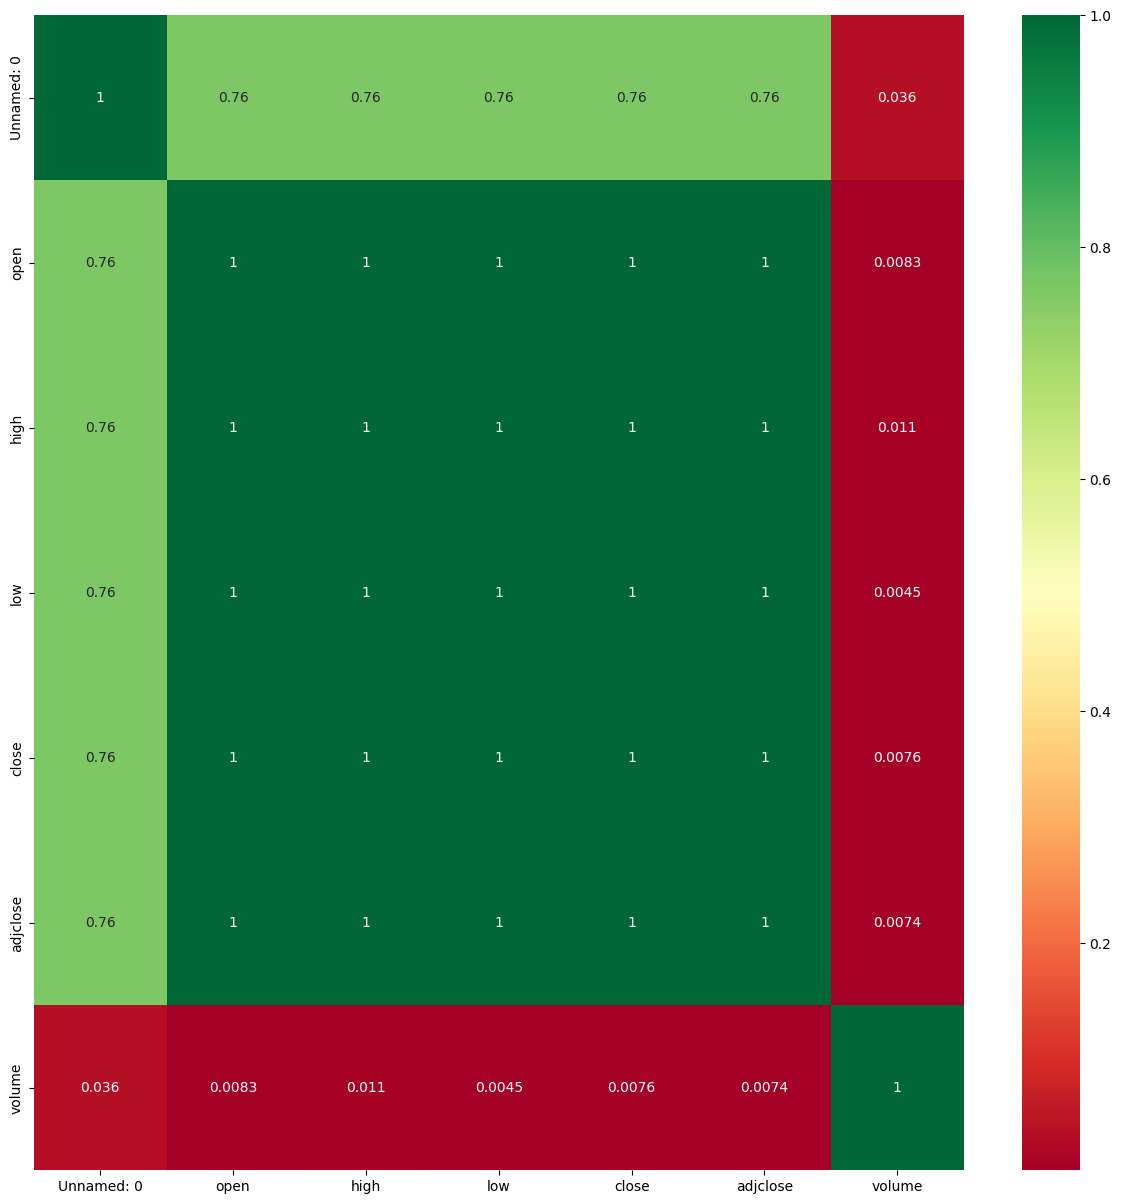

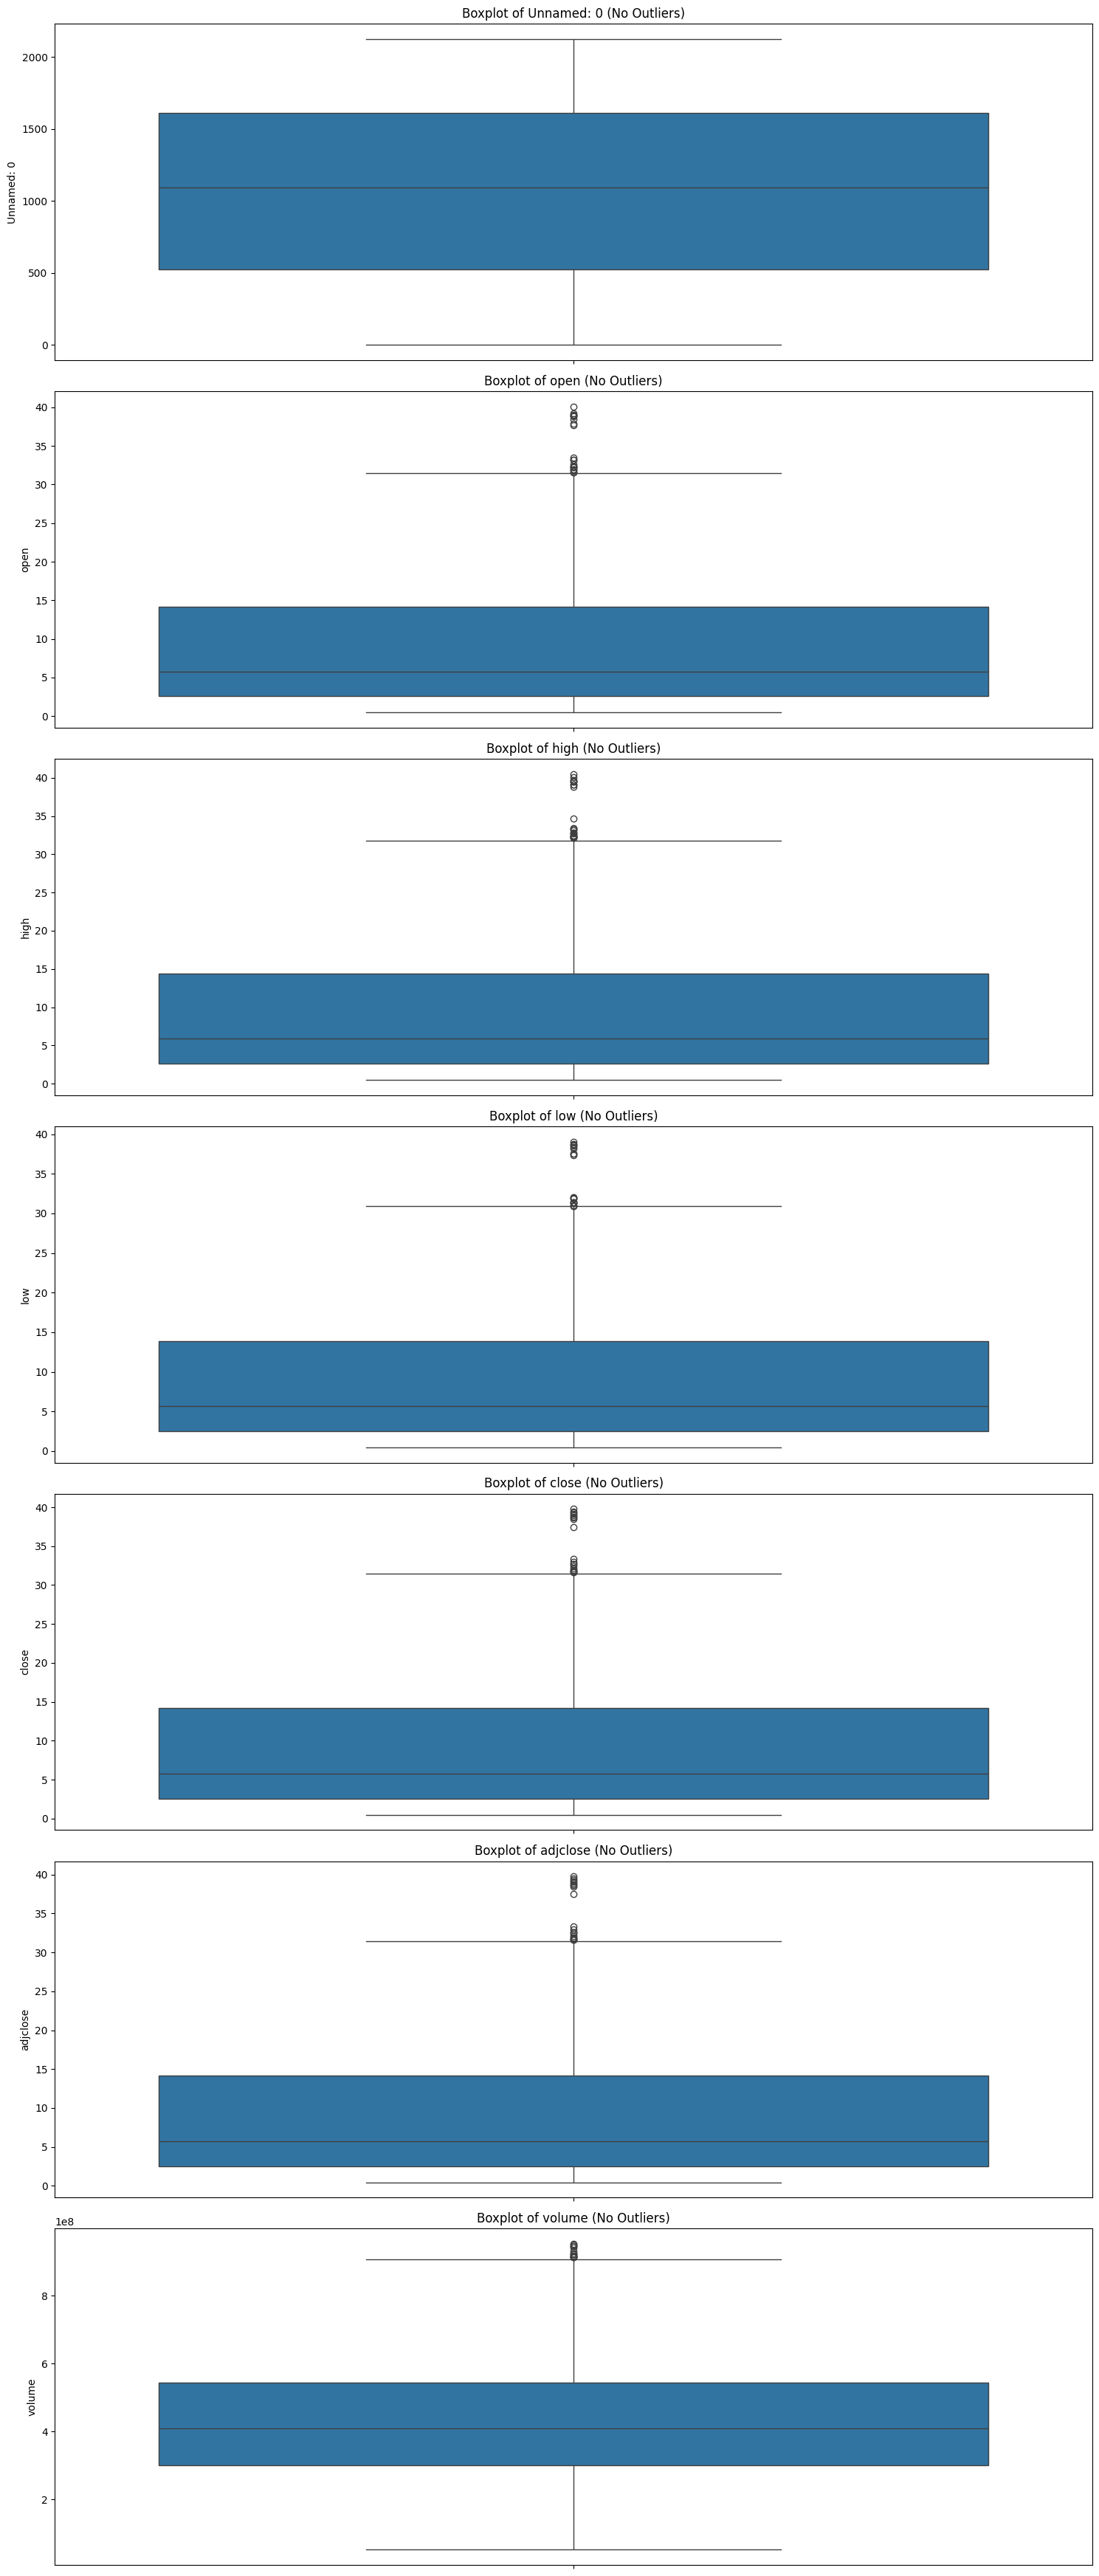

Null value in data set is :- Unnamed: 0    0
date          0
open          0
high          0
low           0
close         0
adjclose      0
volume        0
dtype: int64
Intercept: -0.011
Coefficients: [-6.28967579e-01  8.05924536e-01  8.25863137e-01 -3.47255558e-12]
X_train shape: (1658, 4), y_train shape: (1658,)
X_test shape: (711, 4), y_test shape: (711,)
Training R^2 score: 1.00
Testing R^2 score: 1.00


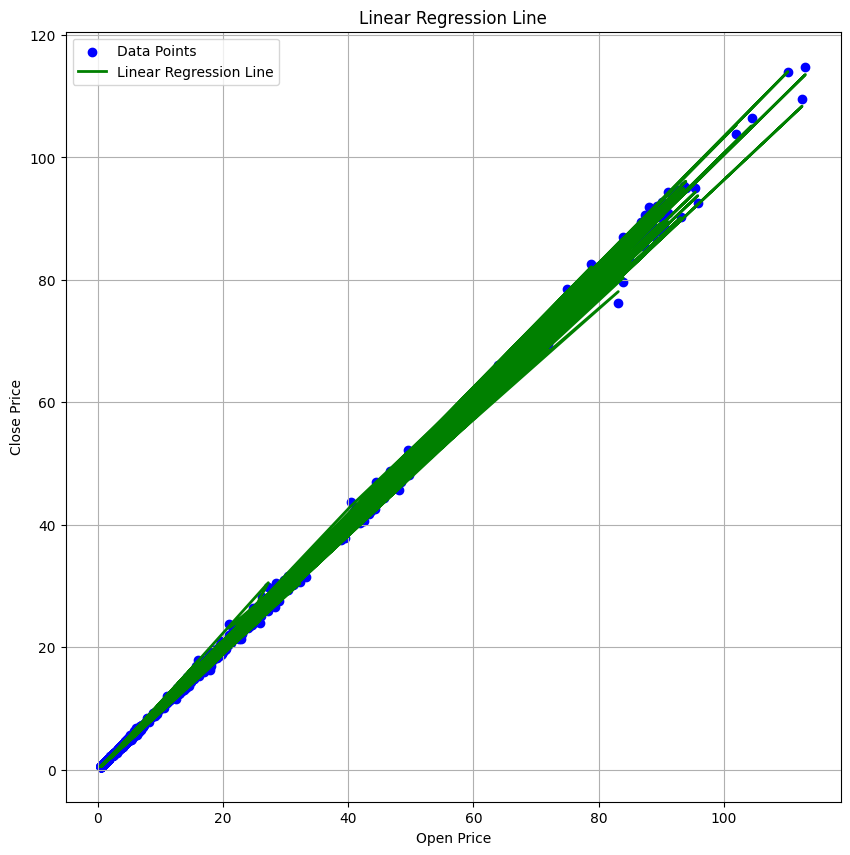

Predicted close price for 2024-06-26: 125.16


In [ ]:
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] > lower_bound) & (df_clean[col] < upper_bound)]
    return df_clean

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import robust
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
nvidia=pd.read_csv('NVIDIA.csv')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
nvidia.info()
duplicate=nvidia.duplicated().sum()
print('Duplicated value in data set is :-',duplicate,sep=' ')
nvidia.describe()
numerical_cols = nvidia.select_dtypes(include=['number'])
plt.figure(figsize=(15,15))
sns.heatmap(numerical_cols.corr(),annot=True,cbar=True,cmap='RdYlGn')
plt.show()
nvidia_clean = remove_outliers(nvidia, numerical_cols.columns)
plt.figure(figsize=(15, len(numerical_cols.columns) * 5))
for i, column in enumerate(numerical_cols.columns, 1):
    plt.subplot(len(numerical_cols.columns), 1, i)
    sns.boxplot(y=nvidia_clean[column])
    plt.title(f'Boxplot of {column} (No Outliers)')
    plt.xlabel('')
plt.tight_layout()
plt.show()
null=nvidia.isnull().sum()
print('Null value in data set is :-',null,sep=' ')
X=nvidia[['open','high','low','volume']]
y=nvidia['close']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficients: {model.coef_:}')
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f'Training R^2 score: {train_score:.2f}')
print(f'Testing R^2 score: {test_score:.2f}')
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
plt.figure(figsize=(10, 10))
plt.scatter(X_train['open'], y_train, color='blue', label='Data Points')
plt.plot(X_train['open'], pred_train, color='green', linewidth=2, label='Linear Regression Line')
plt.title('Linear Regression Line')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()
new_data = pd.DataFrame({
    'open': [126.13],
    'high': [128.12],
    'low': [122.60],
    'volume': [362975900]
})
predicted_close = model.predict(new_data)
print(f'Predicted close price for 2024-06-26: {predicted_close[0]:.2f}')
